<a href="https://colab.research.google.com/github/linshaochieh2019/test/blob/main/rsnaPre_EDA_value_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchio
!pip install pytorch-lightning

     |████████████████████████████████| 156 kB 5.4 MB/s 
     |████████████████████████████████| 48.4 MB 8.4 kB/s 
     |████████████████████████████████| 925 kB 5.8 MB/s 
     |████████████████████████████████| 282 kB 56.2 MB/s 
     |████████████████████████████████| 125 kB 47.8 MB/s 
     |████████████████████████████████| 829 kB 40.4 MB/s 
     |████████████████████████████████| 636 kB 62.2 MB/s 
     |████████████████████████████████| 1.3 MB 59.3 MB/s 
     |████████████████████████████████| 160 kB 62.6 MB/s 
     |████████████████████████████████| 271 kB 45.5 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=f7737081ea3b1475697597960942844846145df3876c80dde2f9271df18ef24c
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled 

In [2]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
import torchio as tio
import pytorch_lightning as pl
from torch.utils.data import random_split, DataLoader, Dataset

class RSNAPre(pl.LightningDataModule):
  def __init__(self, data_dir, batch_size:int=8):
    super().__init__()
    self.data_dir = data_dir
    self.batch_size = batch_size

    self.transform = tio.Compose([
                                  tio.transforms.Resize((64, 64, 64)),
                                  #tio.RescaleIntensity(out_min_max=(-1, 1)),
                                  #tio.transforms.ZNormalization(),
                                  ])

  def setup(self):

    self.train_set = tio.datasets.RSNAMICCAI(self.data_dir, 
                                        train=True, 
                                        transform=self.transform,
                                        )

  
  def dataset(self):
    return self.train_set
  
  
# call main
if __name__ == '__main__':
  dataset = RSNAPre(data_dir='/content/drive/MyDrive/Data/rsna_practice')
  dataset.setup()
  dataset = dataset.dataset()

# Functions for EDA

In [5]:
import matplotlib.pyplot as plt

def load_img_3d(dataset, index, modality):
  img_3d_arr = dataset[index][modality]['data'][0]
  return img_3d_arr

def show_slices(patient_id, modality):

  print(dataset[patient_id]['MGMT_value'])

  img_3d = load_img_3d(dataset, patient_id, modality)
  plt.figure(figsize=(16,16))

  for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(img_3d[:,:,i])
    plt.title('slice #{}'.format(i))

  plt.tight_layout()

In [6]:
label_map = {}

for i in range(len(dataset)):
  subject = dataset[i]
  label_map[subject['BraTS21ID']] = subject['MGMT_value']
  
print(label_map)

{'00000': 1, '00002': 1, '00003': 0, '00006': 1, '00008': 1, '00009': 0, '00011': 1, '00017': 0}


# Check black area's value

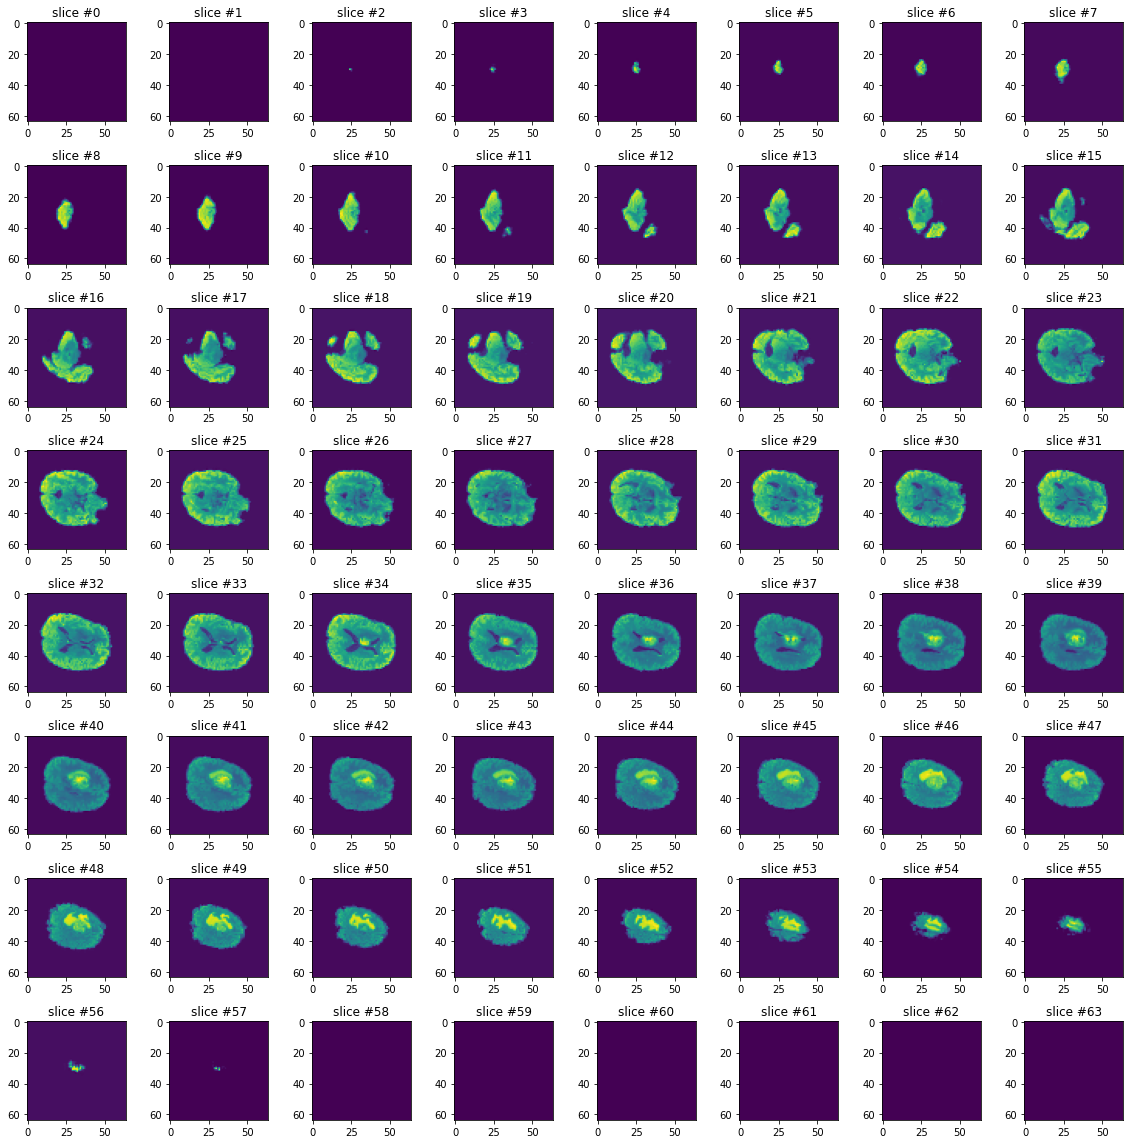

In [ ]:
img_3d = load_img_3d(dataset, 2, 'FLAIR')
plt.figure(figsize=(16,16))

for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(img_3d[:,:,i])
  plt.title('slice #{}'.format(i))

plt.tight_layout()

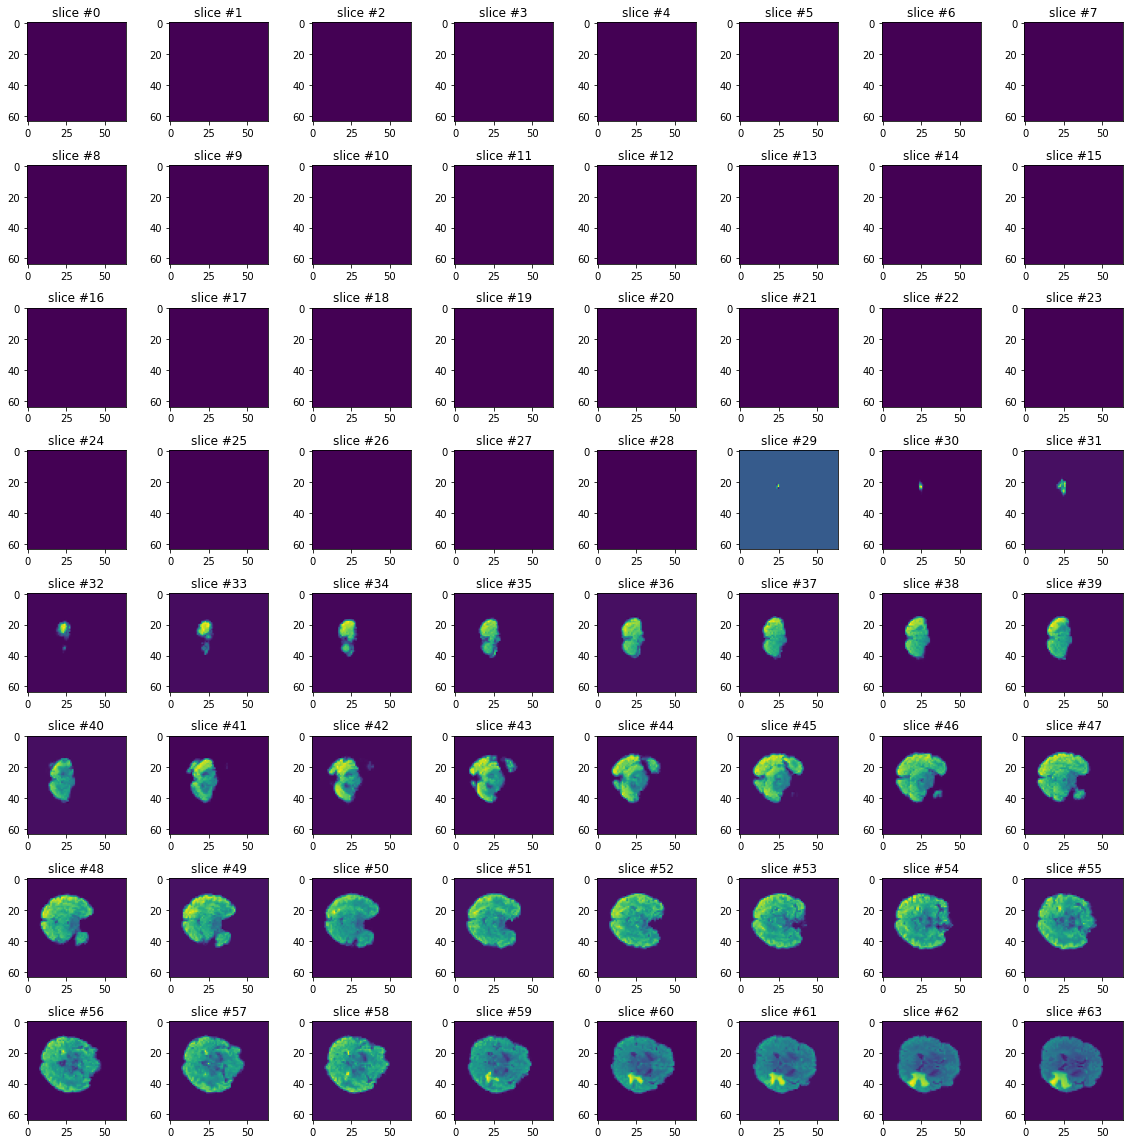

In [ ]:
patient_id = 6
modality = 'FLAIR'

print(dataset[patient_id]['MGMT_value'])

img_3d = load_img_3d(dataset, patient_id, modality)
plt.figure(figsize=(16,16))

for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(img_3d[:,:,i])
  plt.title('slice #{}'.format(i))

plt.tight_layout()

0


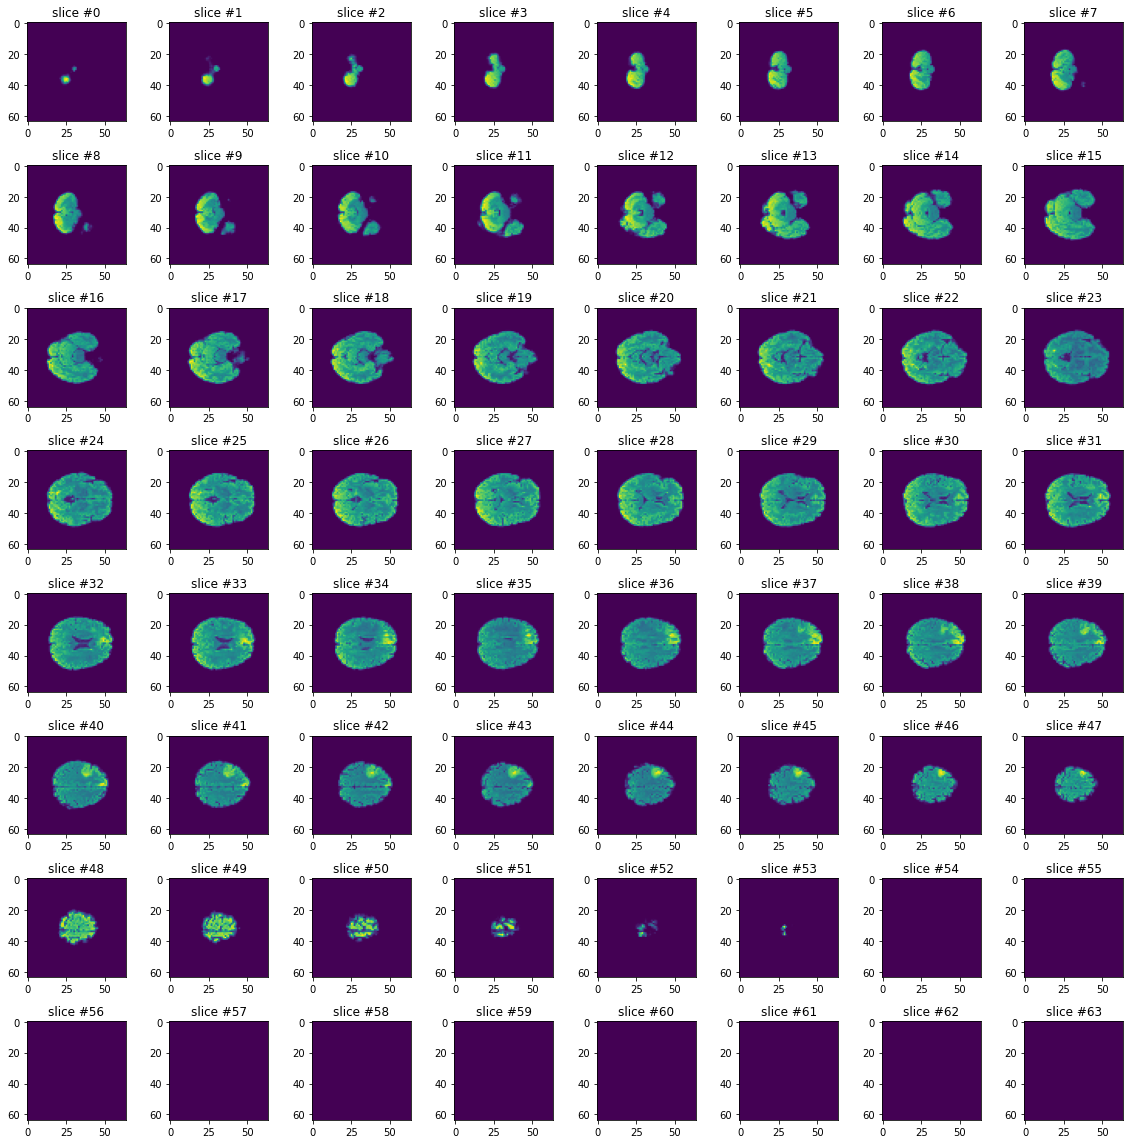

In [ ]:
patient_id = 5
modality = 'FLAIR'

print(dataset[patient_id]['MGMT_value'])

img_3d = load_img_3d(dataset, patient_id, modality)
plt.figure(figsize=(16,16))

for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(img_3d[:,:,i])
  plt.title('slice #{}'.format(i))

plt.tight_layout()

0


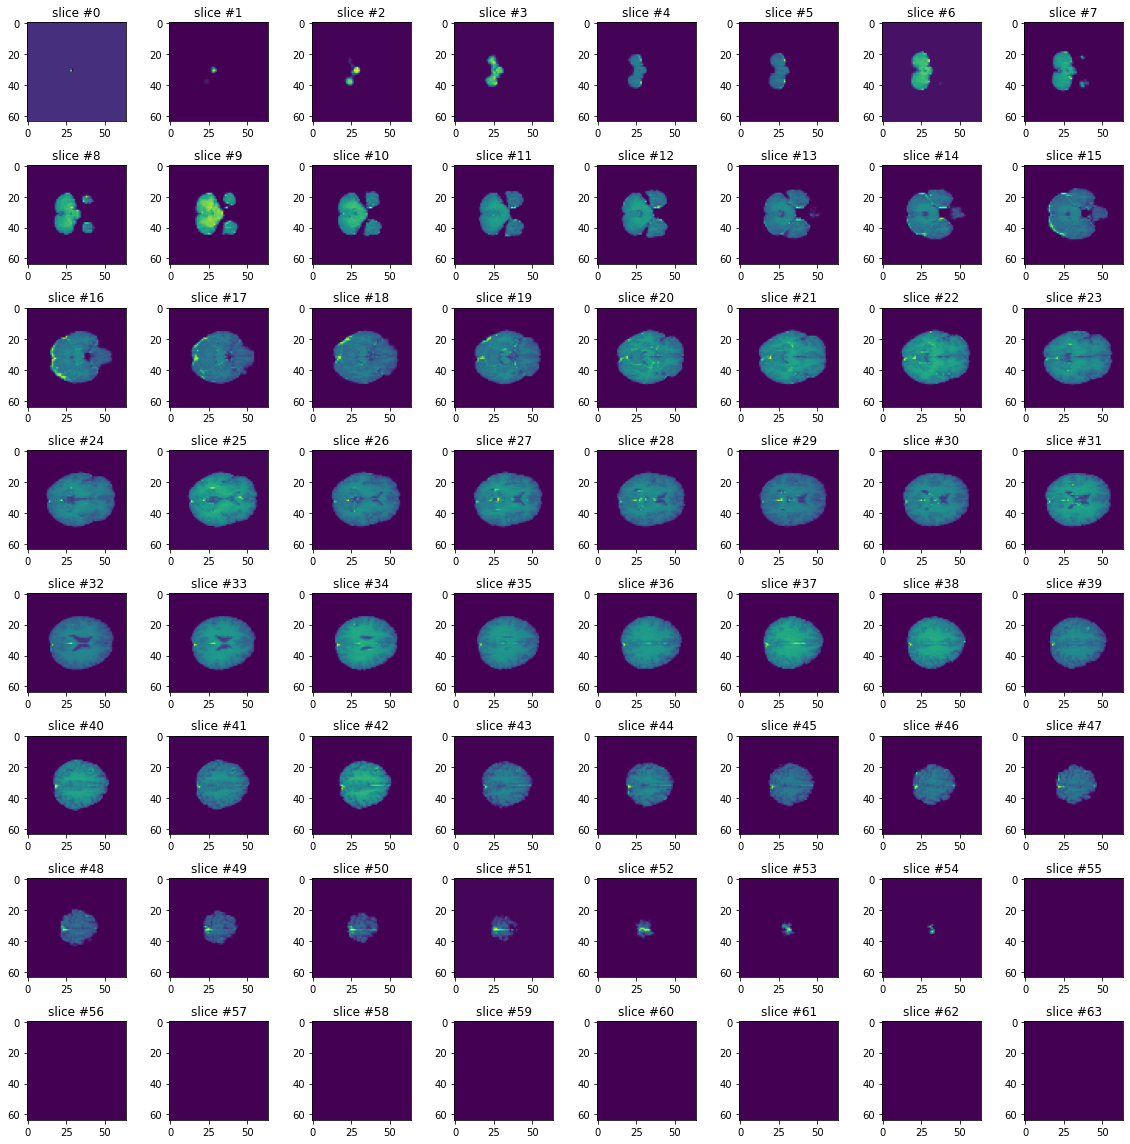

In [ ]:
patient_id = 5
modality = 'T1wCE'

print(dataset[patient_id]['MGMT_value'])

img_3d = load_img_3d(dataset, patient_id, modality)
plt.figure(figsize=(16,16))

for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(img_3d[:,:,i])
  plt.title('slice #{}'.format(i))

plt.tight_layout()

0


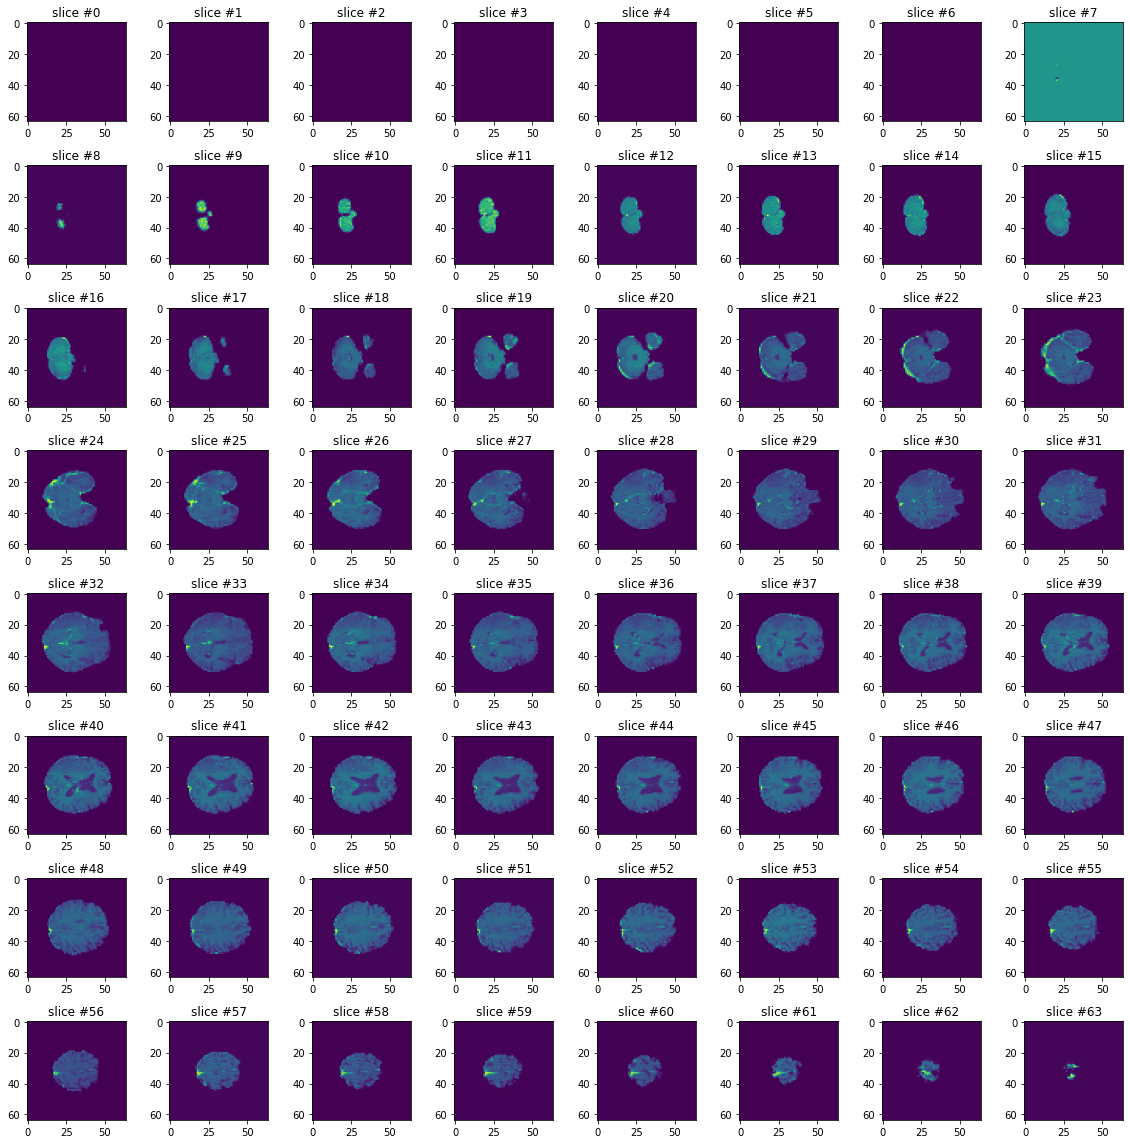

In [ ]:
patient_id = 7
modality = 'T1wCE'

print(dataset[patient_id]['MGMT_value'])

img_3d = load_img_3d(dataset, patient_id, modality)
plt.figure(figsize=(16,16))

for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(img_3d[:,:,i])
  plt.title('slice #{}'.format(i))

plt.tight_layout()

1


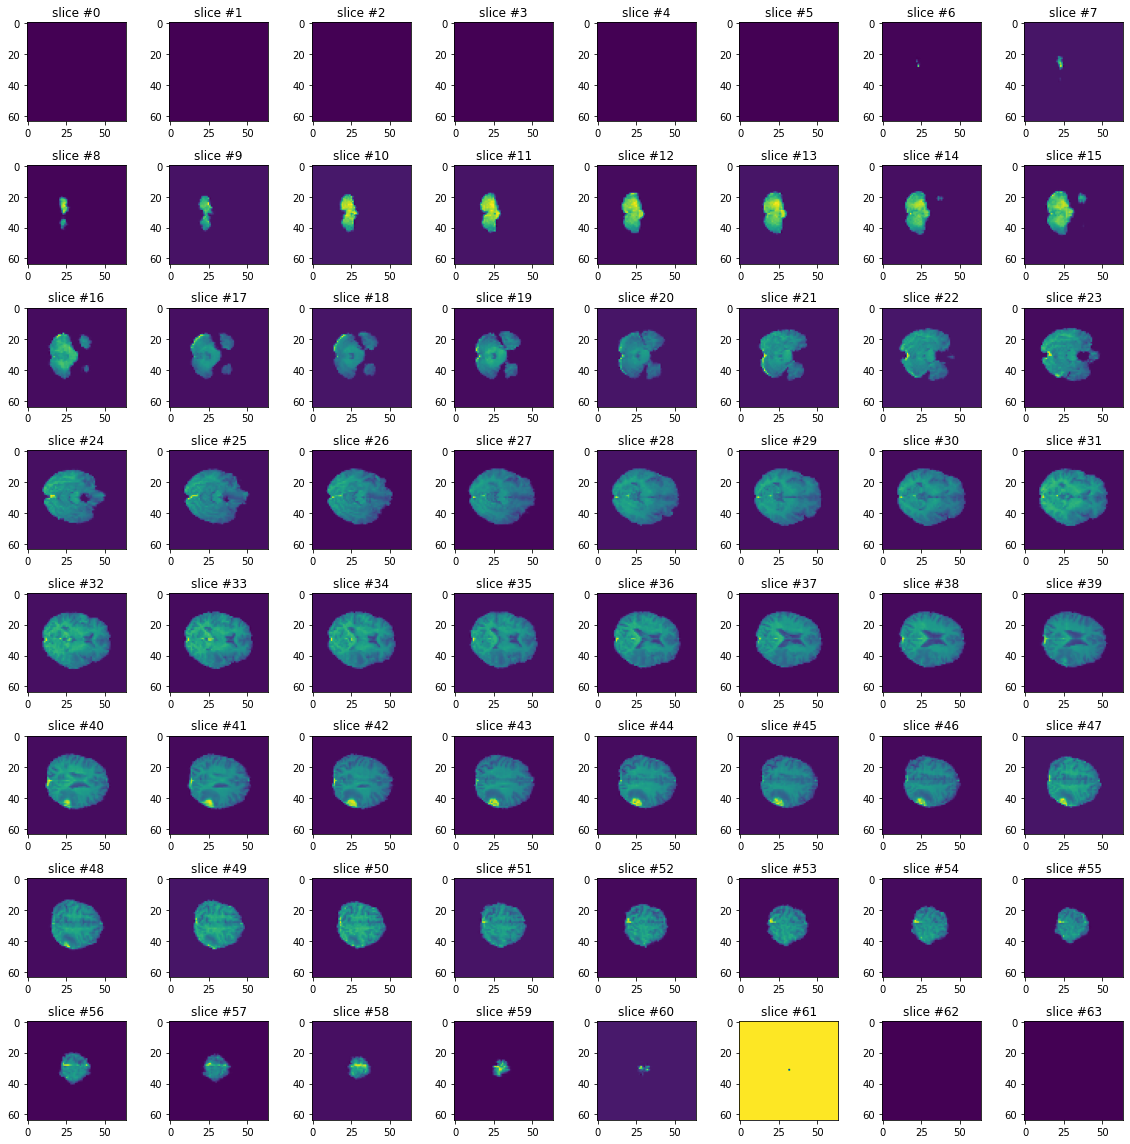

In [ ]:
patient_id = 6
modality = 'T1wCE'

print(dataset[patient_id]['MGMT_value'])

img_3d = load_img_3d(dataset, patient_id, modality)
plt.figure(figsize=(16,16))

for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(img_3d[:,:,i])
  plt.title('slice #{}'.format(i))

plt.tight_layout()

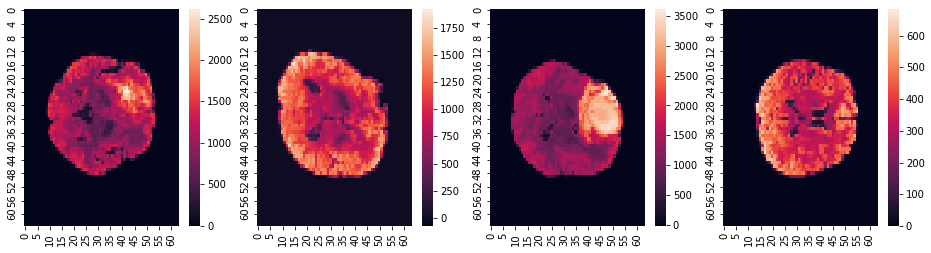

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,4))

slice_id = 30

plt.subplot(1,4,1)
img_3d = load_img_3d(dataset, 0, 'FLAIR')
sns.heatmap(img_3d[:,:,slice_id])

plt.subplot(1,4,2)
img_3d = load_img_3d(dataset, 2, 'FLAIR')
sns.heatmap(img_3d[:,:,slice_id])

plt.subplot(1,4,3)
img_3d = load_img_3d(dataset, 3, 'FLAIR')
sns.heatmap(img_3d[:,:,slice_id])

plt.subplot(1,4,4)
img_3d = load_img_3d(dataset, 5, 'FLAIR')
sns.heatmap(img_3d[:,:,slice_id])

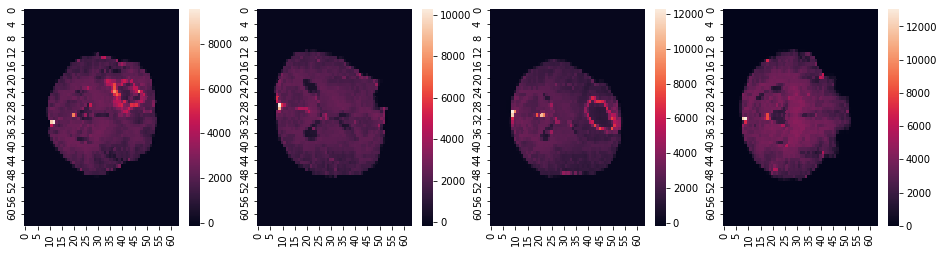

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,4))

modality = 'T1wCE'
slice_id = 30

plt.subplot(1,4,1)
img_3d = load_img_3d(dataset, 0, modality)
sns.heatmap(img_3d[:,:,slice_id])

plt.subplot(1,4,2)
img_3d = load_img_3d(dataset, 2, modality)
sns.heatmap(img_3d[:,:,slice_id])

plt.subplot(1,4,3)
img_3d = load_img_3d(dataset, 3, modality)
sns.heatmap(img_3d[:,:,slice_id])

plt.subplot(1,4,4)
img_3d = load_img_3d(dataset, 4, modality)
sns.heatmap(img_3d[:,:,slice_id])

# Research on FLAIR value area

tumor area seems to be brighter than other area

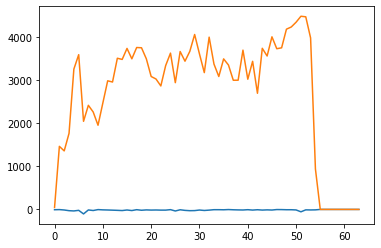

In [ ]:
img_3d = load_img_3d(dataset, 5, 'T1wCE')

ls_min,ls_max = [],[]
for i in range(64):
  slice_i = img_3d[:,:,i]
  min = torch.min(slice_i)
  max = torch.max(slice_i)
  ls_min.append(min)
  ls_max.append(max)

plt.plot(ls_min)
plt.plot(ls_max)

1


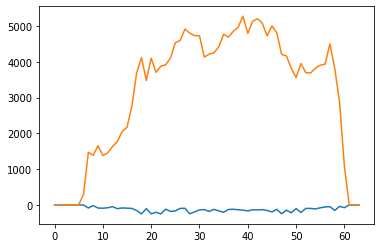

In [ ]:
patient_id = 6
modality = 'T1wCE'

print(dataset[patient_id]['MGMT_value'])

img_3d = load_img_3d(dataset, patient_id, modality)

ls_min,ls_max = [],[]
for i in range(64):
  slice_i = img_3d[:,:,i]
  min = torch.min(slice_i)
  max = torch.max(slice_i)
  ls_min.append(min)
  ls_max.append(max)

plt.plot(ls_min)
plt.plot(ls_max)

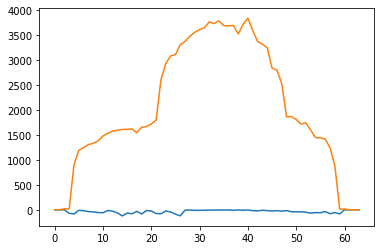

In [ ]:
# What about a negative case' flair value area?

img_3d = load_img_3d(dataset, 3, 'FLAIR')

ls_min,ls_max = [],[]
for i in range(64):
  slice_i = img_3d[:,:,i]
  min = torch.min(slice_i)
  max = torch.max(slice_i)
  ls_min.append(min)
  ls_max.append(max)

plt.plot(ls_min)
plt.plot(ls_max)

# Check on a specific patient

0


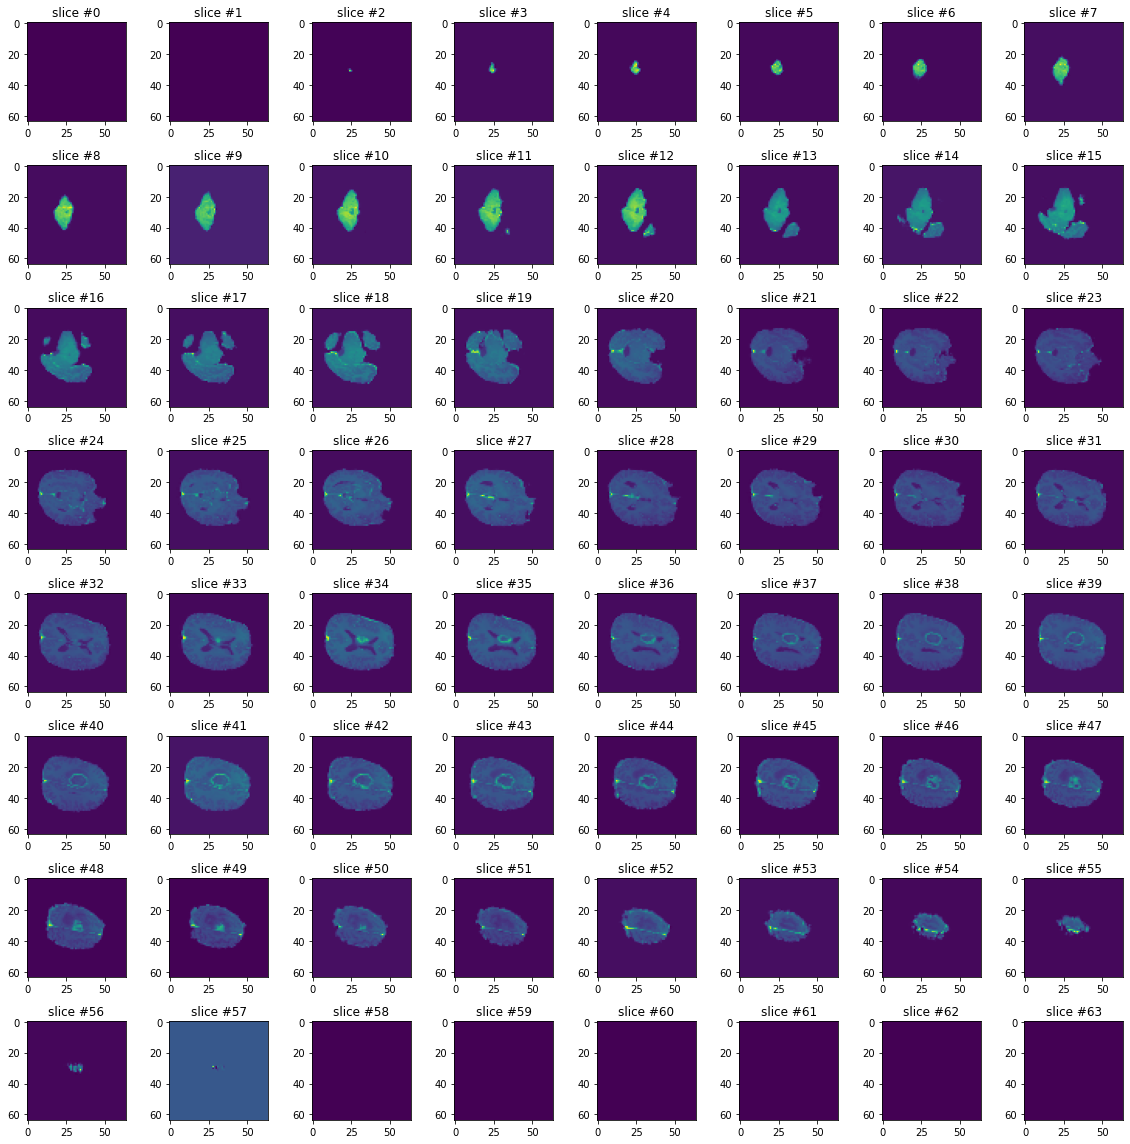

In [ ]:
patient_id = 2
modality = 'T1wCE'

show_slices(patient_id, modality)

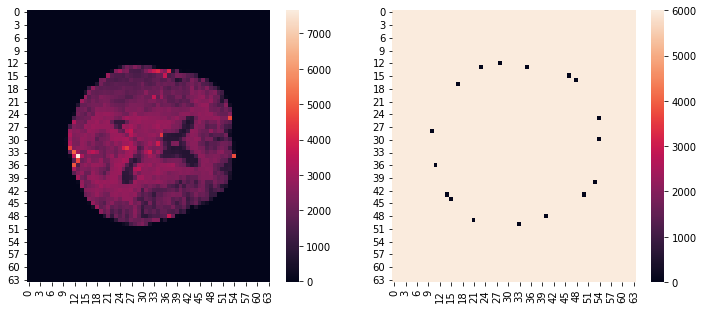

In [ ]:
slice_temp = dataset[patient_id][modality]['data'][0][:,:,38]

slice_temp_ce = torch.where(slice_temp<0, 0, 6000)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(slice_temp)

plt.subplot(1,2,2)
sns.heatmap(slice_temp_ce)

# What happens if we do rescale the value area to [0,1]

In [ ]:
class RSNAPre(pl.LightningDataModule):
  def __init__(self, data_dir, batch_size:int=8):
    super().__init__()
    self.data_dir = data_dir
    self.batch_size = batch_size

    self.transform = tio.Compose([
                                  tio.transforms.Resize((64, 64, 64)),
                                  tio.RescaleIntensity(out_min_max=(0, 1)),
                                  #tio.transforms.ZNormalization(),
                                  ])

  def setup(self):

    self.train_set = tio.datasets.RSNAMICCAI(self.data_dir, 
                                        train=True, 
                                        transform=self.transform,
                                        )

  
  def dataset(self):
    return self.train_set
  
  
# call main
if __name__ == '__main__':
  dataset_rescaled = RSNAPre(data_dir='/content/drive/MyDrive/Data/rsna_practice')
  dataset_rescaled.setup()
  dataset_rescaled = dataset_rescaled.dataset()

In [ ]:
dataset_rescaled